In [24]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [3]:
airbnb = pd.read_csv('paris_airbnb_2.csv')

In [4]:
type(airbnb)

pandas.core.frame.DataFrame

In [7]:
airbnb.iloc[0]

host_response_rate                 100%
host_acceptance_rate                NaN
host_listings_count                   1
latitude                        48.8335
longitude                       2.31852
city                              Paris
zipcode                           75014
state                     Île-de-France
accommodates                          2
room_type               Entire home/apt
bedrooms                              0
bathrooms                             1
beds                                  0
price                            $75.00
cleaning_fee                     $50.00
security_deposit                  $0.00
minimum_nights                        3
maximum_nights                       15
number_of_reviews                     8
Name: 0, dtype: object

In [9]:
our_acc_value = 3
first_living_space_value = airbnb.iloc[0]['accommodates']
first_distance = np.abs(first_living_space_value - our_acc_value)
print(first_distance)

1


In [13]:
new_listing = 3
airbnb['distance'] = airbnb['accommodates'].apply(lambda x:np.abs(x - new_listing))
print(airbnb['distance'].value_counts())

1     5665
0      878
2      726
3      508
4       88
5       82
6       18
7       14
9        8
11       4
8        4
13       3
10       2
Name: distance, dtype: int64


In [14]:
airbnb[airbnb['distance'] == 0]['accommodates']

3       3
7       3
13      3
14      3
18      3
       ..
7907    3
7938    3
7948    3
7958    3
7989    3
Name: accommodates, Length: 878, dtype: int64

In [19]:
np.random.seed(1)
airbnb = airbnb.loc[np.random.permutation(len(airbnb))]
airbnb = airbnb.sort_values('distance')
airbnb.iloc[0:10]['price']

1956     $80.00
3735     $67.00
6944     $36.00
2094    $120.00
2968     $60.00
845     $200.00
6083     $95.00
5970     $95.00
2992     $76.00
3179    $100.00
Name: price, dtype: object

In [20]:
stripped_commas = airbnb["price"].str.replace(',','')
stripped_dollars = stripped_commas.str.replace('$','')
airbnb['price'] = stripped_dollars.astype('float')
mean_price = airbnb.iloc[0:5]['price'].mean()
print(mean_price)

72.6


In [30]:
airbnb = airbnb.loc[np.random.permutation(len(airbnb))]

train_df = airbnb.iloc[0:6000] 
test_df  = airbnb.iloc[6000:]


def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x:np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()
    return(predicted_price)
  
acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)

print(acc_one)
print(acc_two)
print(acc_four)


48.2
98.4
138.0


In [31]:
test_df['predicted_price'] = test_df['accommodates'].apply(lambda x:predict_price(x))

In [32]:
test_df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,...,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,distance,predicted_price
3337,NaN,NaN,1.0,48.83049,2.32686,Paris,75014,Paris,2,Entire home/apt,...,1.0,1.0,85.0,$40.00,$500.00,5,20,33,1,98.4
2447,80%,NaN,2.0,48.85191,2.39058,Paris,75011,Île-de-France,3,Entire home/apt,...,1.0,1.0,95.0,$100.00,$350.00,12,1125,1,0,90.4
2159,NaN,NaN,1.0,48.82794,2.32615,Paris,75014,Île-de-France,3,Entire home/apt,...,1.0,2.0,75.0,$0.00,$150.00,35,62,2,0,90.4
6071,NaN,NaN,1.0,48.84953,2.32997,Paris,75007,Île-de-France,5,Entire home/apt,...,1.0,2.0,110.0,$40.00,$200.00,1,1125,84,2,149.6
4175,NaN,NaN,1.0,48.82022,2.35602,Paris,75013,Île-de-France,5,Entire home/apt,...,1.5,4.0,120.0,$70.00,$500.00,6,60,2,2,149.6


In [34]:
test_df['error'] = np.abs(test_df['predicted_price'] - test_df['price'])
mae = test_df['error'].mean()
print(mae)

51.22359999999969


In [36]:
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**2
mse = test_df['squared_error'].mean()
print(mse)

8404.194760000064


In [38]:
airbnb = airbnb.loc[np.random.permutation(len(airbnb))]

train_df = airbnb.iloc[0:6000] 
test_df  = airbnb.iloc[6000:]


def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bedrooms'].apply(lambda x:np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()
    return(predicted_price)
  
test_df["predicted_price"] = test_df["bedrooms"].apply(lambda x:predict_price(x))
test_df["squared_error"] = (test_df["predicted_price"] - test_df["price"])**2
mse = test_df["squared_error"].mean()

print(mse)

7545.989219999977


In [39]:
test_df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,...,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,distance,predicted_price,squared_error
1787,100%,NaN,1.0,48.84868,2.29359,Paris,75015,Île-de-France,8,Entire home/apt,...,5.0,300.0,$70.00,$800.00,4,30,72,5,214.0,7396.00
3323,NaN,NaN,1.0,48.85223,2.32726,Paris,75007,Île-de-France,4,Entire home/apt,...,1.0,100.0,$50.00,$600.00,5,10000,10,1,87.2,163.84
3693,100%,NaN,1.0,48.86483,2.30397,Paris,75008,Île-de-France,2,Entire home/apt,...,1.0,73.0,$30.00,$150.00,2,1124,53,1,77.2,17.64
7630,70%,NaN,1.0,48.85953,2.35711,Paris,75004,Île-de-France,2,Entire home/apt,...,1.0,125.0,$20.00,$200.00,2,15,16,1,87.2,1428.84
3948,100%,NaN,1.0,48.84665,2.35213,Paris,75005,Île-de-France,2,Entire home/apt,...,1.0,129.0,$40.00,$500.00,3,30,62,1,87.2,1747.24


In [40]:
test_df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'latitude', 'longitude', 'city', 'zipcode', 'state', 'accommodates',
       'room_type', 'bedrooms', 'bathrooms', 'beds', 'price', 'cleaning_fee',
       'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'distance', 'predicted_price', 'squared_error'],
      dtype='object')

In [42]:
mycols = ["bedrooms","beds","price","predicted_price","squared_error"]
test_df.loc[:,mycols].head(10)

,bedrooms,beds,price,predicted_price,squared_error
1787,3.0,5.0,300.0,214.0,7396.00
3323,1.0,1.0,100.0,87.2,163.84
3693,0.0,1.0,73.0,77.2,17.64
7630,1.0,1.0,125.0,87.2,1428.84
3948,1.0,1.0,129.0,87.2,1747.24
142,3.0,3.0,80.0,214.0,17956.00
315,1.0,1.0,60.0,87.2,739.84
5820,1.0,1.0,58.0,87.2,852.64
1032,1.0,1.0,24.0,87.2,3994.24
1478,1.0,2.0,95.0,87.2,60.84


In [99]:
import pandas as pd
import numpy as np
np.random.seed(1)

ar = pd.read_csv("paris_airbnb.csv")
ar = ar.loc[np.random.permutation(len(ar))]

stripped_commas = ar["price"].str.replace(',','')
stripped_dollars = stripped_commas.str.replace('$','')
ar['price'] = stripped_dollars.astype('float')

print(ar.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 4740 to 5157
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    5000 non-null   object 
 1   host_acceptance_rate  0 non-null      float64
 2   host_listings_count   7999 non-null   float64
 3   latitude              8000 non-null   float64
 4   longitude             8000 non-null   float64
 5   city                  7997 non-null   object 
 6   zipcode               7930 non-null   object 
 7   state                 7977 non-null   object 
 8   accommodates          8000 non-null   int64  
 9   room_type             8000 non-null   object 
 10  bedrooms              7976 non-null   float64
 11  bathrooms             7942 non-null   float64
 12  beds                  7986 non-null   float64
 13  price                 8000 non-null   float64
 14  cleaning_fee          6250 non-null   object 
 15  security_deposit  

In [100]:
drop_columns = ["host_response_rate","host_acceptance_rate","host_listings_count","latitude","longitude","city","zipcode","state","room_type","cleaning_fee","security_deposit"]
ar = ar.drop(drop_columns, axis=1)

In [101]:
print(ar.isnull().sum())

accommodates          0
bedrooms             24
bathrooms            58
beds                 14
price                 0
minimum_nights        0
maximum_nights        0
number_of_reviews     0
dtype: int64


In [102]:
ar = ar.dropna(axis=0)
print(ar.isnull().sum())

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


In [103]:
ar.head(10)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
4740,4,1.0,1.0,2.0,65.0,2,1125,6
5606,3,2.0,1.5,2.0,98.0,5,1124,1
4824,2,0.0,1.0,1.0,65.0,10,1125,0
4205,2,1.0,1.0,1.0,45.0,5,1125,83
3228,3,1.0,1.0,2.0,65.0,5,365,5
2745,4,1.0,1.0,2.0,88.0,3,30,120
3611,2,0.0,1.0,1.0,45.0,5,1124,71
3491,2,1.0,2.0,1.0,115.0,30,365,26
1185,4,1.0,1.0,2.0,40.0,7,15,2
74,7,2.0,1.5,4.0,110.0,14,365,49


In [104]:
#normalisation des données, ex : max de nuits a des valeurs avec des écarts trop importants de 15 à 1125. 
#on normalise avec l'écart type std
norm_ar = (ar - ar.mean()) / (ar.std())
#on remplace la valeur normalisée par la valeur initiale sur les prix
norm_ar["price"] = ar["price"]
print(norm_ar.head())

      accommodates  bedrooms  bathrooms     beds  price  minimum_nights  \
4740      0.503868 -0.296884  -0.293537  0.20531   65.0       -0.184601   
5606     -0.131849  0.892605   0.843973  0.20531   98.0       -0.101183   
4824     -0.767566 -1.486372  -0.293537 -0.64526   65.0        0.037847   
4205     -0.767566 -0.296884  -0.293537 -0.64526   45.0       -0.101183   
3228     -0.131849 -0.296884  -0.293537  0.20531   65.0       -0.101183   

      maximum_nights  number_of_reviews  
4740        1.062858          -0.564545  
5606        1.061018          -0.636924  
4824        1.062858          -0.651400  
4205        1.062858           0.550105  
3228       -0.335685          -0.579021  


In [107]:
#calcul de la distance euclidienne sur un tableau normalisé
from scipy.spatial import distance

first_ar = norm_ar.iloc[0][["accommodates","bedrooms"]]
fifth_ar = norm_ar.iloc[4][["accommodates","bedrooms"]]

first_fifth_distance = distance.euclidean(first_ar, fifth_ar)

#distance euclidienne entre les 2 lignes
print(first_fifth_distance)

0.6357172321498359


In [114]:
from sklearn.neighbors import KNeighborsRegressor

train_df = norm_ar.iloc[0:6000]
test_df = norm_ar.iloc[6000:]
train_columns = ["accommodates","bedrooms"]

knn =  KNeighborsRegressor(n_neighbors = 5, algorithm = "brute")

#adapte le modèle aux données
knn.fit(train_df[train_columns],train_df["price"])

#utilise le modèle
predictions = knn.predict(test_df[train_columns])

predictions

array([ 72. ,  79.2,  79.2, ...,  72. , 148.4,  79.2])

In [115]:
from sklearn.metrics import mean_squared_error

two_feature_mse = mean_squared_error(test_df["price"],predictions)
two_feature_rmse = two_feature_mse**(1/2)

print(two_feature_mse)
print(two_feature_rmse)


6067.834762649973
77.89630776005993


In [118]:
from sklearn.neighbors import KNeighborsRegressor

features = ["accommodates","bedrooms","bathrooms","number_of_reviews"]

knn = KNeighborsRegressor(n_neighbors=5,algorithm="brute")

knn.fit(train_df[features],train_df["price"])

four_predictions = knn.predict(test_df[features])

four_mse = mean_squared_error(test_df["price"],four_predictions)

four_rmse = four_mse ** (1/2)

print(four_mse)
print(four_rmse)





5488.169827856025
74.08218293122864


In [122]:
knn = KNeighborsRegressor(n_neighbors=5,algorithm="brute")

features = train_df.columns.tolist()
features.remove("price")

knn.fit(train_df[features],train_df["price"])

all_features_predictions = knn.predict(test_df[features])

all_features_mse = mean_squared_error(test_df["price"], all_features_predictions)

all_features_rmse = all_features_mse ** (1/2)

print(all_features_mse)
print(all_features_rmse)



7241.331684924361
85.0960145066992


In [125]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("paris_airbnb_train.csv")
test_df  = pd.read_csv("paris_airbnb_test.csv")

test_df.head(10)


,Unnamed: 0,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,7539,-0.767566,-1.486372,-2.568557,-0.64526,75.0,-0.184601,1.062858,-0.651400
1,2765,-0.767566,-0.296884,-0.293537,-0.64526,60.0,-0.184601,-0.998153,-0.405309
2,6605,-0.767566,-0.296884,-0.293537,-0.64526,30.0,-0.156795,-0.979751,-0.115789
3,515,0.503868,-0.296884,-0.293537,1.90645,112.0,0.037847,-0.841737,-0.550069
4,7291,1.775303,0.892605,-0.293537,0.20531,405.0,-0.101183,1.062858,-0.275025
5,2709,0.503868,0.892605,-0.293537,1.05588,130.0,-0.184601,1.062858,-0.506641
6,356,-0.767566,-0.296884,-0.293537,-0.64526,110.0,-0.184601,-0.841737,-0.622448
7,6767,-0.767566,-0.296884,-0.293537,-0.64526,90.0,-0.184601,-0.952148,-0.550069
8,7279,0.503868,-1.486372,-0.293537,-0.64526,35.0,-0.045571,1.062858,-0.492165
9,2710,-0.767566,-0.296884,-0.293537,-0.64526,93.0,0.176878,-0.639316,0.057922


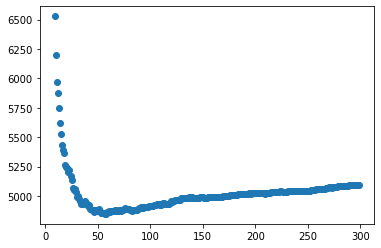

In [144]:
#Modèle de test avec les colonnes définies
#Modèle est bon car la valeur de la moyenne quadratique moyenne est basse

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline


features = ["accommodates","bedrooms","bathrooms","number_of_reviews"]
hyper_params = [x for x in range (9,300)]
mse_values = list()

for hp in hyper_params :
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm="brute")
    knn.fit(train_df[features], train_df["price"])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df["price"], predictions)
    mse_values.append(mse)
    #rmse = mse ** (1/2)

#graphique
plt.scatter(hyper_params, mse_values)
plt.show()

In [146]:
print(min(mse_values))

4848.211829106493


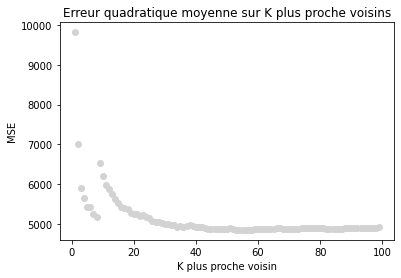

In [155]:
#Modèle de test avec toutes les colonnes, sauf price
#Modèle est moins bon que le précédent
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

features = ["accommodates","bedrooms","bathrooms","number_of_reviews"]

hyper_params = [x for x in range (1,100)]
mse_values = list()

for hp in hyper_params :
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm="brute")
    knn.fit(train_df[features], train_df["price"])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df["price"], predictions)
    mse_values.append(mse)
    #rmse = mse ** (1/2)

#graphique
fig, ax = plt.subplots()
ax.set(title='Erreur quadratique moyenne sur K plus proche voisins',xlabel ='K plus proche voisin', ylabel ='MSE')
plt.scatter(hyper_params, mse_values, color='#D3D3D3')
plt.show()


In [140]:
print(min(mse_values))

8631.118014378913


In [158]:
#Modèle de test avec deux tests : avec 2 et 3 colonnes
#Modèle est moins bon que le précédent
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

two_features = ["accommodates","bedrooms"]
three_features = ["accommodates","bedrooms","bathrooms"]

hyper_params = [x for x in range (1,100)]

two_mse_values = list()
three_mse_values = list()

two_hp_mse = dict()
three_hp_mse = dict()

for hp in hyper_params :
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm="brute")
    knn.fit(train_df[two_features], train_df["price"])    
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df["price"], predictions)
    two_mse_values.append(mse)

two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

for k,mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k+1


for hp in hyper_params :
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm="brute")
    knn.fit(train_df[three_features], train_df["price"])    
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df["price"], predictions)
    three_mse_values.append(mse)

three_mse_values = three_mse_values[0]
three_lowest_k = 1


#for k,mse in enumerate(three_mse_values):
#    if mse < three_lowest_mse:
#        three_lowest_mse = mse
#        three_lowest_k = k+1

#utilisation du dictionnaire
two_hp_mse[two_lowest_k] = two_lowest_mse
#three_hp_mse[three_lowest_k] = three_lowest_mse

print(two_hp_mse)
#print(three_hp_mse)

#graphique
#plt.scatter(hyper_params, mse_values)
#plt.show()

{37: 5495.886032587592}
